In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# "1-	Préparez vos donnes et nettoyer les si besoin."

print("dimension of diabetes data: {}".format(data.shape))

dimension of diabetes data: (768, 9)


In [4]:
# Nombre total de valeurs manquantes pour chaque caractéristique
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
# des valeurs manquantes?
print(data.isnull().values.any())

False


<AxesSubplot:xlabel='Outcome', ylabel='count'>

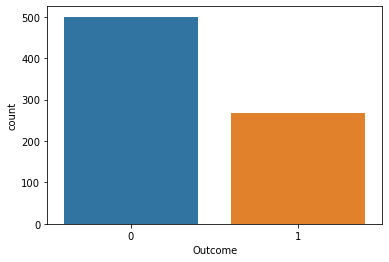

In [6]:
import seaborn as sns
#Countng values of outcomes having 0 or 1, 0 means non diabetic and 1 means diabetic
sns.countplot(x='Outcome',data=data)

In [7]:
#"2-nous allons découper nos données en un jeu d'entraînement (X_train, y_train) et un jeu de test (X_test, y_test)."
import numpy as np

# features selection
X = data[data.columns[:-1]].values

# target selection
y = data['Outcome'].values


In [8]:
#Removing unnessary columns

X.shape

(768, 8)

In [9]:
from sklearn import model_selection

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=0.8)

In [10]:
#-----------SVM-----------
# standardiser les données
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [11]:
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
##Create a svm Classifier
classifier = svm.SVC(C=1000, gamma='auto') #C = 1000, gamma='auto' gives the best performance and minimum overfitting

# Entraîner la SVM sur le jeu d'entraînement

classifier.fit(X_train_std, y_train)
#effectuez une prédiction sur le jeu de test
y_pred_svm=classifier.predict(X_test_std)

print("Correct:",sum(y_pred_svm == y_test))
print("Incorrect : ",sum(y_pred_svm != y_test))
print("Accuracy:",sum(y_pred_svm ==y_test)/len(y_pred_svm))

Correct: 419
Incorrect :  196
Accuracy: 0.6813008130081301


In [12]:
#Confusion matrix
import seaborn as sns

def normalized_confusion_matrix(y_test, conf_mat, model):
    _ , counts = np.unique(y_test,return_counts=True)
    conf_mat = conf_mat/counts
    plt.figure(figsize=(5,5))
    ax=sns.heatmap(conf_mat,fmt='.2f',annot=True,annot_kws={'size':20},lw=2, cbar=True, cbar_kws={'label':'% Class accuracy'})
    plt.title(f'Confusion Matrix ({model})',size=20)
    plt.xticks(size=15)
    plt.yticks(size=15)
    ax.figure.axes[-1].yaxis.label.set_size(20) ##colorbar label
    cax = plt.gcf().axes[-1]  ##colorbar ticks
    cax.tick_params(labelsize=20) ## colorbar ticks
    plt.savefig(f'confusion-matrix-{model}.png',dpi=300)
    


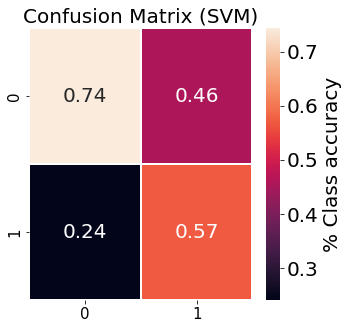

In [13]:
conf_mat = confusion_matrix(y_test,y_pred_svm)
normalized_confusion_matrix(y_test,conf_mat,'SVM')

In [14]:
#K-fold cross-validation
from sklearn.model_selection import cross_val_score


k_fold_svm_accuracy = cross_val_score(classifier, std_scale.fit_transform(X), y, cv=10) ##10-fold cross validation
k_fold_svm_f1 = cross_val_score(classifier, std_scale.fit_transform(X), y, cv=10, scoring='f1_macro') ##10-fold cross validation

In [15]:
print(f'Average accuracy after 10 fold cross validation : {k_fold_svm_accuracy.mean().round(2)} +/- {k_fold_svm_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation : {k_fold_svm_f1.mean().round(2)} +/- {k_fold_svm_f1.std().round(2)}')

Average accuracy after 10 fold cross validation : 0.69 +/- 0.04
Average F1-score after 10 fold cross validation : 0.66 +/- 0.04


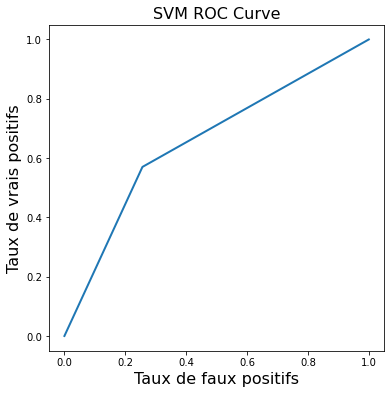

In [16]:
# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(y_test, y_pred_svm)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('Taux de faux positifs', fontsize=16)
plt.ylabel('Taux de vrais positifs', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

plt.show()

In [17]:
k_fold_svm_accuracy = cross_val_score(classifier, std_scale.fit_transform(X), y, cv=10) ##10-fold cross validation
k_fold_svm_f1 = cross_val_score(classifier, std_scale.fit_transform(X), y, cv=10, scoring='f1_macro') ##10-fold cross validation

In [18]:
print(f'Average accuracy after 10 fold cross validation : {k_fold_svm_accuracy.mean().round(2)} +/- {k_fold_svm_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation : {k_fold_svm_f1.mean().round(2)} +/- {k_fold_svm_f1.std().round(2)}')

Average accuracy after 10 fold cross validation : 0.69 +/- 0.04
Average F1-score after 10 fold cross validation : 0.66 +/- 0.04


In [19]:
#-----KNN--------
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
y_pred_knn = knn.predict(X_test_std)
print("Correct:",sum(y_pred_knn==y_test))
print("Incorrect : ",sum(y_pred_knn != y_test))
print("Accuracy:",sum(y_pred_knn ==y_test)/len(y_pred_knn))

Correct: 443
Incorrect :  172
Accuracy: 0.7203252032520325


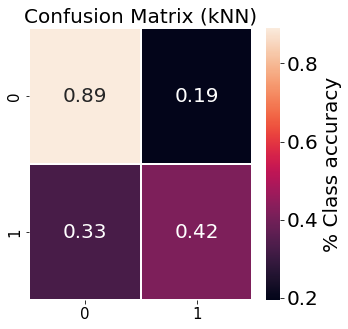

In [20]:
conf_mat = confusion_matrix(y_test,y_pred_knn)
normalized_confusion_matrix(y_test,conf_mat, 'kNN')


In [21]:
# The above heatmap says 0,0 means true negative and 1,1 means true positive 
# and 0,1 means even person is negative but showing result positive
# and 1,0 means person is positive but shows negative so its danger so we need to accurate our model

In [22]:
k_fold_knn_accuracy = cross_val_score(knn, X, y, cv=10) ##10-fold cross validation
k_fold_knn_f1 = cross_val_score(knn, X, y, cv=10, scoring='f1_macro') ##10-fold cross validation

In [23]:
print(f'Average accuracy after 10 fold cross validation :{k_fold_knn_accuracy.mean().round(2)} +/- {k_fold_knn_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation :{k_fold_knn_f1.mean().round(2)} +/- {k_fold_knn_f1.std().round(2)}')

Average accuracy after 10 fold cross validation :0.72 +/- 0.04
Average F1-score after 10 fold cross validation :0.68 +/- 0.06


In [24]:
#-----Logistic Regression ------
from sklearn.linear_model import LogisticRegression



In [25]:
logreg = LogisticRegression(C=1,solver='newton-cg').fit(X_train,y_train)
y_pred_log=logreg.predict(X_test)
print("Accuracy on test: {:.3f}".format(accuracy_score(y_pred_log, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred_log, y_test)))

Accuracy on test: 0.751
F1-score on test set: 0.620


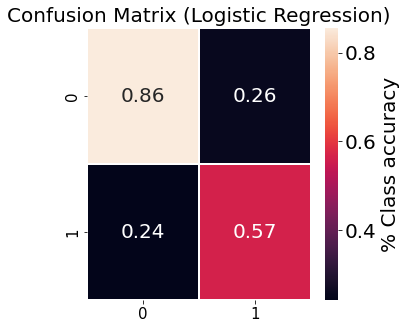

In [26]:
conf_mat = confusion_matrix(y_test,y_pred_log)
normalized_confusion_matrix(y_test,conf_mat,'Logistic Regression')

In [27]:
#K-fold cross validation
from sklearn.model_selection import cross_val_score
k_fold_logreg_accuracy = cross_val_score(logreg, X, y, cv=10) ##10-fold cross validation
k_fold_logreg_f1 = cross_val_score(logreg, X, y, cv=10, scoring='f1_macro') ##10-fold cross validation

In [28]:
print(f'Average accuracy after 10 fold cross validation :{k_fold_logreg_accuracy.mean().round(2)} +/- {k_fold_logreg_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation :{k_fold_logreg_f1.mean().round(2)} +/- {k_fold_logreg_f1.std().round(2)}')

Average accuracy after 10 fold cross validation :0.77 +/- 0.04
Average F1-score after 10 fold cross validation :0.74 +/- 0.04


In [29]:
#------- Random Forest------
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train, y_train)
y_pred_Rd=rf.predict(X_test)

print("Accuracy on test: {:.3f}".format(accuracy_score(y_pred_Rd, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred_Rd, y_test)))

Accuracy on test: 0.748
F1-score on test set: 0.604


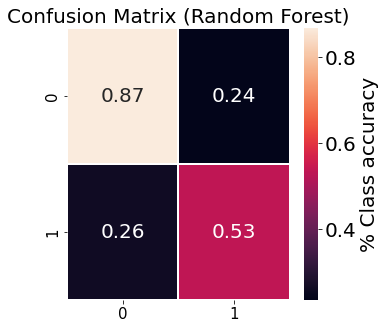

In [30]:
conf_mat = confusion_matrix(y_test,y_pred_Rd)
normalized_confusion_matrix(y_test,conf_mat,'Random Forest')

In [31]:
k_fold_rf_accuracy = cross_val_score(rf, X, y, cv=10) ##10-fold cross validation
k_fold_rf_f1 = cross_val_score(rf, X, y, cv=10, scoring='f1_macro') ##10-fold cross validation

In [32]:
print(f'Average accuracy after 10 fold cross validation :{k_fold_rf_accuracy.mean().round(2)} +/- {k_fold_rf_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation :{k_fold_rf_f1.mean().round(2)} +/- {k_fold_rf_f1.std().round(2)}')

Average accuracy after 10 fold cross validation :0.76 +/- 0.06
Average F1-score after 10 fold cross validation :0.73 +/- 0.06


In [33]:
all_accuracies = [k_fold_knn_accuracy.mean().round(2),
                   k_fold_logreg_accuracy.mean().round(2),
                   k_fold_rf_accuracy.mean().round(2),
                   k_fold_svm_accuracy.mean().round(2)]

all_accuracies_errors = [k_fold_knn_accuracy.std().round(2),
                   k_fold_logreg_accuracy.std().round(2),
                   k_fold_rf_accuracy.std().round(2),
                   k_fold_svm_accuracy.std().round(2)]

In [34]:
all_f1 = [k_fold_knn_accuracy.mean().round(2),
                   k_fold_logreg_accuracy.mean().round(2),
                   k_fold_rf_accuracy.mean().round(2),
                   k_fold_svm_accuracy.mean().round(2)]

all_f1_errors = [k_fold_knn_accuracy.mean().round(2),
                   k_fold_logreg_accuracy.mean().round(2),
                   k_fold_rf_accuracy.mean().round(2),
                   k_fold_svm_accuracy.mean().round(2)]

In [35]:
models=['kNN','Logistic Regression','Random Forest','SVM']

In [36]:
model_data = pd.DataFrame([all_accuracies,all_accuracies_errors,all_f1,all_f1_errors],columns=models, index = ['Accuracy','STD_acc','F1-macro','STD_f1']).T
model_data.style.background_gradient(cmap='coolwarm',axis=0)

,Accuracy,STD_acc,F1-macro,STD_f1
kNN,0.720000,0.040000,0.720000,0.720000
Logistic Regression,0.770000,0.040000,0.770000,0.770000
Random Forest,0.760000,0.060000,0.760000,0.760000
SVM,0.690000,0.040000,0.690000,0.690000


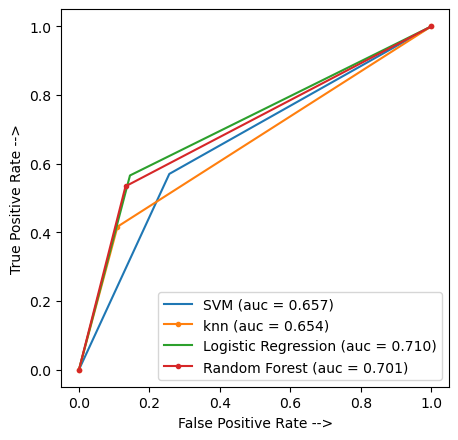

In [37]:
from sklearn.metrics import roc_curve, auc

knn_fpr, knn_tpr, thr = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

svm_fpr, svm_tpr, thr = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

log_fpr, log_tpr, thr = roc_curve(y_test, y_pred_log)
auc_log = auc(log_fpr, log_tpr)

Rd_fpr, Rd_tpr, thr = roc_curve(y_test, y_pred_Rd)
auc_Rd = auc(Rd_fpr, Rd_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(knn_fpr, knn_tpr, marker='.', label='knn (auc = %0.3f)' % auc_knn)
plt.plot(log_fpr, log_tpr, linestyle='-', label='Logistic Regression (auc = %0.3f)' % auc_log)
plt.plot(Rd_fpr, Rd_tpr, marker='.', label='Random Forest (auc = %0.3f)' % auc_Rd)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()
##############################################


In [38]:
# define the keras model
from tensorflow import keras
from keras.layers import Dense
from keras.utils import np_utils
from keras.models import Sequential
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))




In [39]:
# compile the keras model
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(X_train, y_train,epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 2ms/step - loss: 4.1225 - accuracy: 0.5948
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 3.3800 - accuracy: 0.5163
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 2.9356 - accuracy: 0.5033
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 2.6310 - accuracy: 0.4771
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 2.2679 - accuracy: 0.4575
Epoch 6/200
5/5 [==============================] - 0s 0s/step - loss: 1.9422 - accuracy: 0.4575
Epoch 7/200
5/5 [==============================] - 0s 0s/step - loss: 1.7035 - accuracy: 0.4052
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 1.4027 - accuracy: 0.3856
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 1.1909 - accuracy: 0.3464
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0001 - accuracy: 0.2941
Epoch 11/200
5/5 [=============

5/5 [==============================] - 0s 2ms/step - loss: 0.6186 - accuracy: 0.6928
Epoch 85/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6170 - accuracy: 0.6928
Epoch 86/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6160 - accuracy: 0.6928
Epoch 87/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6165 - accuracy: 0.6928
Epoch 88/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6152 - accuracy: 0.6928
Epoch 89/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6161 - accuracy: 0.6928
Epoch 90/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6157 - accuracy: 0.6928
Epoch 91/200
5/5 [==============================] - 0s 806us/step - loss: 0.6146 - accuracy: 0.6928
Epoch 92/200
5/5 [==============================] - 0s 855us/step - loss: 0.6140 - accuracy: 0.6928
Epoch 93/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.6928
Epoch 94/200
5/5 [===========

Epoch 167/200
5/5 [==============================] - 0s 3ms/step - loss: 0.6007 - accuracy: 0.6928
Epoch 168/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6005 - accuracy: 0.6928
Epoch 169/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6002 - accuracy: 0.6928
Epoch 170/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6000 - accuracy: 0.6928
Epoch 171/200
5/5 [==============================] - 0s 928us/step - loss: 0.6004 - accuracy: 0.6928
Epoch 172/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6003 - accuracy: 0.6928
Epoch 173/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6009 - accuracy: 0.6928
Epoch 174/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6006 - accuracy: 0.6928
Epoch 175/200
5/5 [==============================] - 0s 3ms/step - loss: 0.6001 - accuracy: 0.6928
Epoch 176/200
5/5 [==============================] - 0s 971us/step - loss: 0.5996 - accuracy: 0.6928
Epoch 

In [40]:
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('train_Accuracy: %.2f' % (accuracy*100))
_, accuracy = model.evaluate(X_test, y_test)
print('test_Accuracy: %.2f' % (accuracy*100))

5/5 [==============================] - 0s 3ms/step - loss: 0.5979 - accuracy: 0.6928
train_Accuracy: 69.28
20/20 [==============================] - 0s 1ms/step - loss: 0.8690 - accuracy: 0.6407
test_Accuracy: 64.07


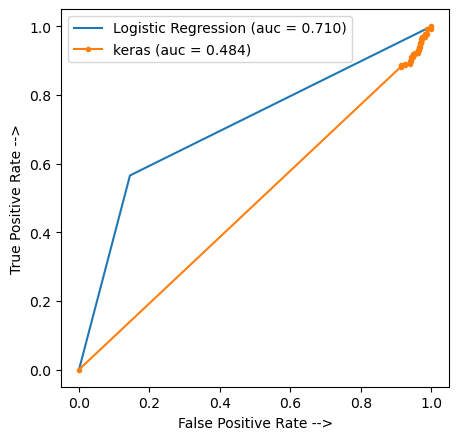

In [41]:
y_pred_keras=model.predict(X_test)

og_fpr, log_tpr, thr = roc_curve(y_test, y_pred_log)
auc_log = auc(log_fpr, log_tpr)

keras_fpr, keras_tpr, thr = roc_curve(y_test, y_pred_keras)
auc_keras = auc(keras_fpr, keras_tpr)

plt.figure(figsize=(5, 5), dpi=100)

plt.plot(log_fpr, log_tpr, linestyle='-', label='Logistic Regression (auc = %0.3f)' % auc_log)
plt.plot(keras_fpr, keras_tpr, marker='.', label='keras (auc = %0.3f)' % auc_keras)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [42]:
import pickle
pickle.dump(classifier, open('classifier.pkl', 'wb'))

In [43]:
pickle.dump(std_scale, open('sc.pkl', 'wb'))